In [1]:
import warnings
warnings.filterwarnings(action='ignore')

from glob import glob

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def load_data(file, sheet_name):
    return pd.read_excel(file, sheet_name=sheet_name)

In [3]:
def load_all_data():
    files = glob('/Users/sabin/Documents/Project/뉴스와 소셜데이터 기반 이슈 분석 및 시각화/Trend-analysis/dataset/탄소중립(59,295건)/*.xlsx')
    df = pd.DataFrame()
    for file in files:
        df = df.append(load_data(file, '블로그'))
    return df

news = load_all_data()

## 뉴스 Sheet

In [4]:
news.isna().sum()

Unnamed: 0      0
Unnamed: 1      0
Unnamed: 2     16
Unnamed: 3    200
dtype: int64

In [5]:
news.columns = news.iloc[0]
news.drop(0, inplace=True, axis=0)
news = news.dropna(axis=0, how='any')
news = news[~news['내용'].str.contains('http')]
news = news[news['내용'].str.contains('[가-힣]')]
news = news[news['내용'].str.len() < 1000]

print(news.shape)
news.head()

(5556, 4)


,작성일,작성자,제목,내용
23,2022/06/20,gnfeel,2050 탄소중립을 향한 최종 도민권고안 채택,2050 탄소중립을 향한 최종 도민권고안 채택 \n \n경남 기후도민회의 마지막 전...
28,2022/06/01,eunyoung1122,[과학일기]탄소 중립,안녕하세요? 고운맘입니다. \n \n탄소중립 \n이것이 뭔지 아세요? \n학교에서 ...
42,2022/06/29,thankslee57,"탄소중립 환경교육, 안양시는 유치원부터 시작합니다","최대호 시장 “미래세대 환경문제 인식, 탄소중립 실천” \n안양시가 미래 세대인 유..."
43,2022/06/24,komo5659,"K채널 / 전남도, 공동주택 탄소중립 실천 확산 온힘",전라남도는 전남기후환경네트워크와 함께 탄소중립 생활 실천 확산을 위해 2022 년 ...
44,2022/06/23,iksanagri,익산시 농업기술센터 탄소중립 전직원 역량강화 교육,익산시 농업기술센터 탄소중립 전직원 역량강화 교육 \n- 기후위기에 대한 인식 전환...


## TF-IDF

In [6]:
def tfdif(corpus):
    cv = CountVectorizer(ngram_range=(1, 2), max_features=1000)
    document_term_matrix = cv.fit_transform(corpus)

    tf = pd.DataFrame(document_term_matrix.toarray(), columns=cv.get_feature_names())  # TF (Term Frequency)

    D = len(tf)
    df = tf.astype(bool).sum(axis=0)
    idf = np.log((D+1) / (df+1)) + 1             # IDF (Inverse Document Frequency)

    # TF-IDF (Term Frequency-Inverse Document Frequency)
    tfidf = tf * idf                      
    tfidf = tfidf / np.linalg.norm(tfidf, axis=1, keepdims=True)
    
    return tfidf


In [7]:
tfidf_news = tfdif(news['내용'])

In [8]:
tfidf_news

,00,02,03,04,05,06,10,100,10분간,10일,...,활용,활용하여,활용한,활용해,회장,회장은,효과가,후보,후보는,힘을
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.080463,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5551,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
5552,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.157991,0.0,0.0,0.0,0.0,0.0,0.0
5553,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
5554,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
import pickle

tfidf_news.to_pickle('tfidf_news.pkl')

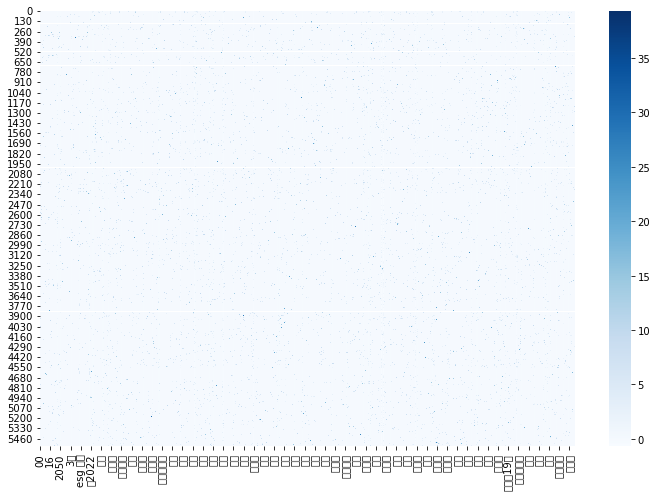

In [10]:
tfidf_news = (tfidf_news - tfidf_news.mean()) / tfidf_news.std()

# visualize

plt.figure(figsize=(12, 8))
sns.heatmap(tfidf_news, cmap='Blues')
plt.show()


# TFDIF

We couldn't figure the relationship between the words linearly

as we can see in the graph above